# Business Problem: 

The company wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. 

# Understanding Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = "aerofit_treadmill_data.csv"
aerofit_df  = pd.read_csv(dataset)

In [3]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit_df.shape

(180, 9)

In [5]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
aerofit_df.duplicated().sum()

0

In [7]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- There are no major outliers 

In [8]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
aerofit_df["Product"].nunique()

3

In [10]:
aerofit_df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [11]:
aerofit_df['Gender'].nunique()

2

In [12]:
aerofit_df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
aerofit_df['MaritalStatus'].nunique()

2

In [14]:
aerofit_df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [15]:
aerofit_df['Price'] = np.where(aerofit_df['Product'] == 'KP281', 1500,
                               np.where(aerofit_df['Product'] == 'KP481', 1750,
                                        np.where(aerofit_df['Product'] == 'KP781', 2500, np.nan)))
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500.0
176,KP781,42,Male,18,Single,5,4,89641,200,2500.0
177,KP781,45,Male,16,Single,5,5,90886,160,2500.0
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500.0


In [16]:
sorted(aerofit_df["Age"].unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50]

In [17]:
sorted(aerofit_df["Education"].unique())

[12, 13, 14, 15, 16, 18, 20, 21]

In [18]:
sorted(aerofit_df["Income"].unique())

[29562,
 30699,
 31836,
 32973,
 34110,
 35247,
 36384,
 37521,
 38658,
 39795,
 40932,
 42069,
 43206,
 44343,
 45480,
 46617,
 47754,
 48556,
 48658,
 48891,
 49801,
 50028,
 51165,
 52290,
 52291,
 52302,
 53439,
 53536,
 54576,
 54781,
 55713,
 56850,
 57271,
 57987,
 58516,
 59124,
 60261,
 61006,
 61398,
 62251,
 62535,
 64741,
 64809,
 65220,
 67083,
 68220,
 69721,
 70966,
 74701,
 75946,
 77191,
 83416,
 85906,
 88396,
 89641,
 90886,
 92131,
 95508,
 95866,
 99601,
 103336,
 104581]

In [19]:
sorted(aerofit_df["Usage"].unique())

[2, 3, 4, 5, 6, 7]

In [20]:
sorted(aerofit_df["Fitness"].unique())

[1, 2, 3, 4, 5]

In [21]:
sorted(aerofit_df["Miles"].unique())

[21,
 38,
 42,
 47,
 53,
 56,
 64,
 66,
 74,
 75,
 80,
 85,
 94,
 95,
 100,
 103,
 106,
 112,
 113,
 120,
 127,
 132,
 140,
 141,
 150,
 160,
 169,
 170,
 180,
 188,
 200,
 212,
 240,
 260,
 280,
 300,
 360]

# Univariate Analysis (Category)

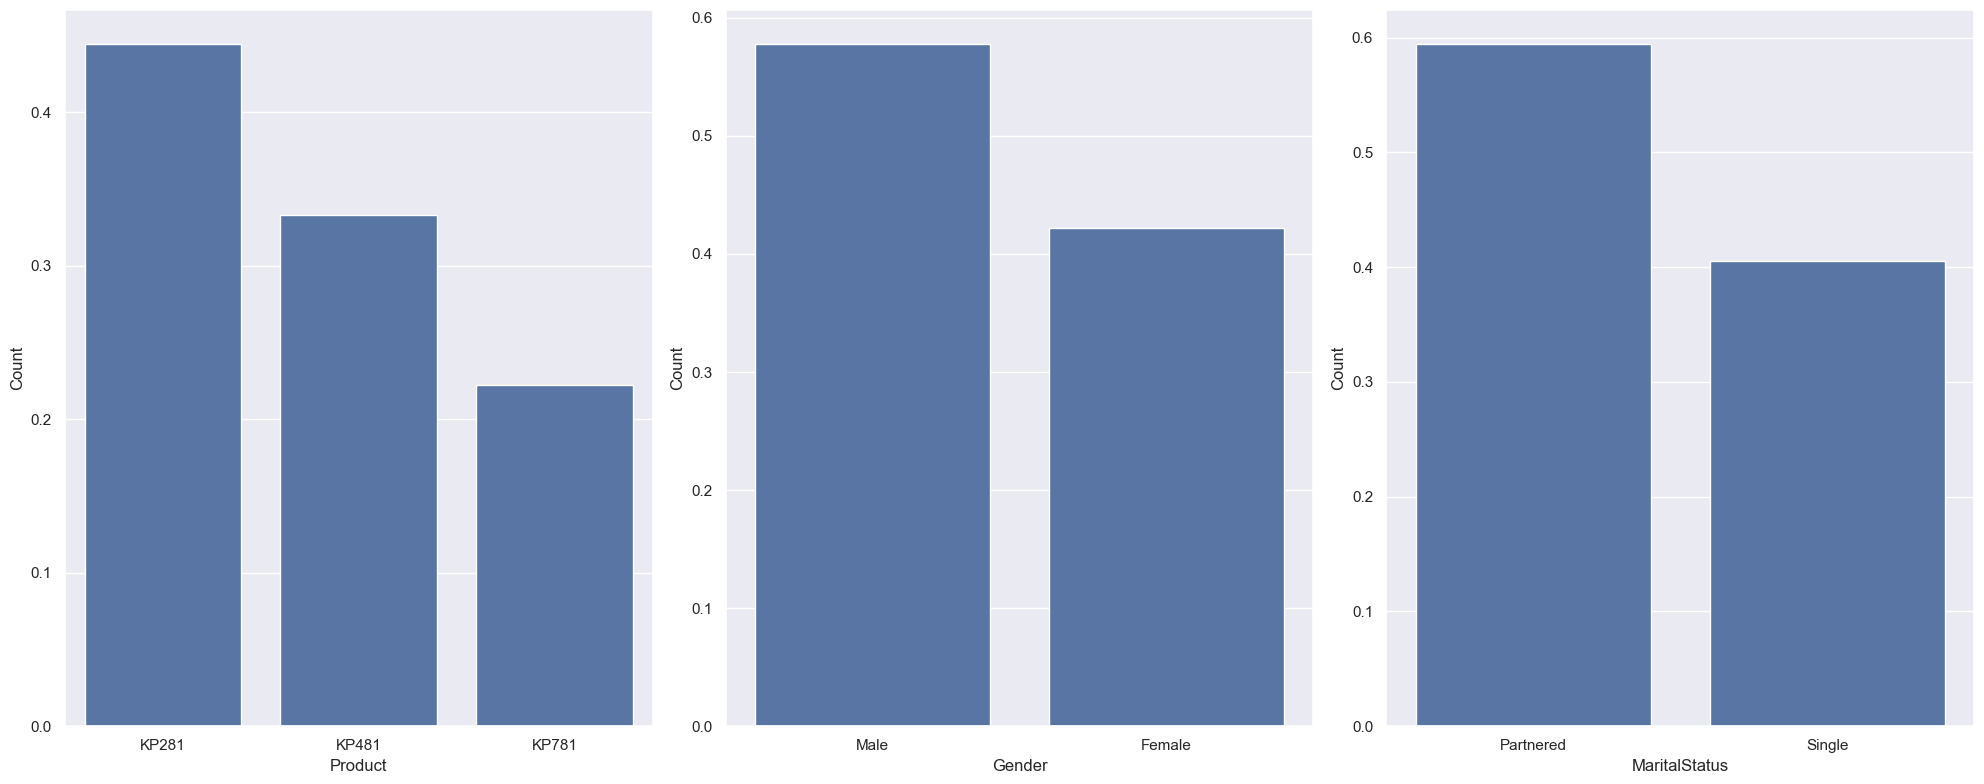

In [22]:
product_count = aerofit_df.Product.value_counts(normalize=True).reset_index(name='Count')
gender_count = aerofit_df.Gender.value_counts(normalize=True).reset_index(name='Count')
marital_count = aerofit_df.MaritalStatus.value_counts(normalize=True).reset_index(name='Count')

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

sns.barplot(data=product_count, x="Product", y='Count', ax=axis[0])
sns.barplot(data=gender_count, x="Gender", y='Count', ax=axis[1])
sns.barplot(data=marital_count, x="MaritalStatus", y='Count', ax=axis[2])

plt.tight_layout()
plt.show()

## Observation 
- KP281 is the most frequent and best-selling product.
- In Gender, there are more Males who are using treadmills than Females.
- The treadmills are more likely to be purchased by partnered people


# Univariate Analysis (Numeric)

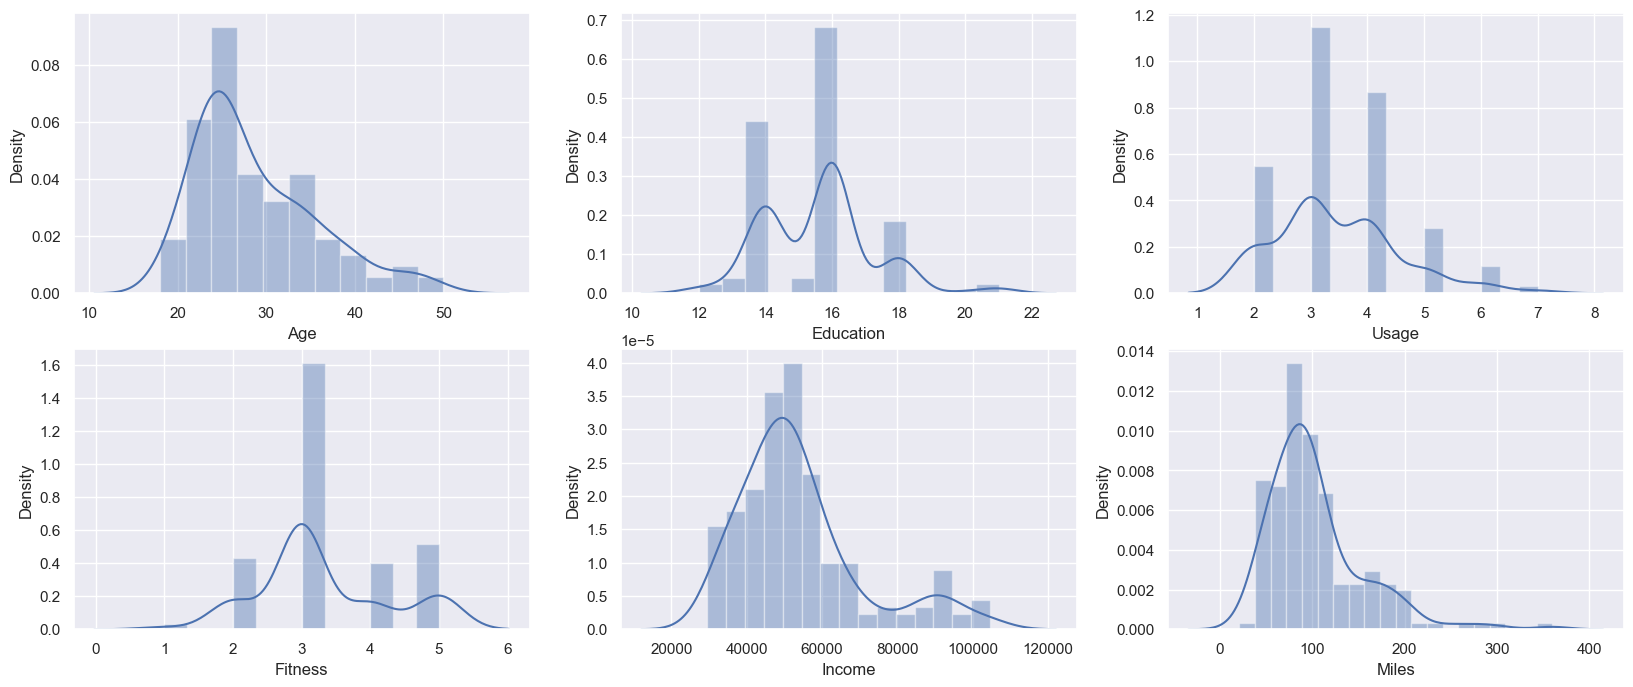

In [23]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

sns.distplot(aerofit_df['Age'], kde=True, ax=axis[0,0])
sns.distplot(aerofit_df['Education'], kde=True, ax=axis[0,1])
sns.distplot(aerofit_df['Usage'], kde=True, ax=axis[0,2])
sns.distplot(aerofit_df['Fitness'], kde=True, ax=axis[1,0])
sns.distplot(aerofit_df['Income'], kde=True, ax=axis[1,1])
sns.distplot(aerofit_df['Miles'], kde=True, ax=axis[1,2])
plt.show()

## Observation 
- The majority of customers are aged between 20-30.
- Customers with 14-16 years of education buy a major chunk of treadmills
- The majority of the customers expect to use the treadmills 3-4 times a week 
- Customers with fitness lev 3 buy a major chunk of treadmills 
- Majority of Customers fall within the $40,000 - $60,000 income range

# Bivariate Analysis

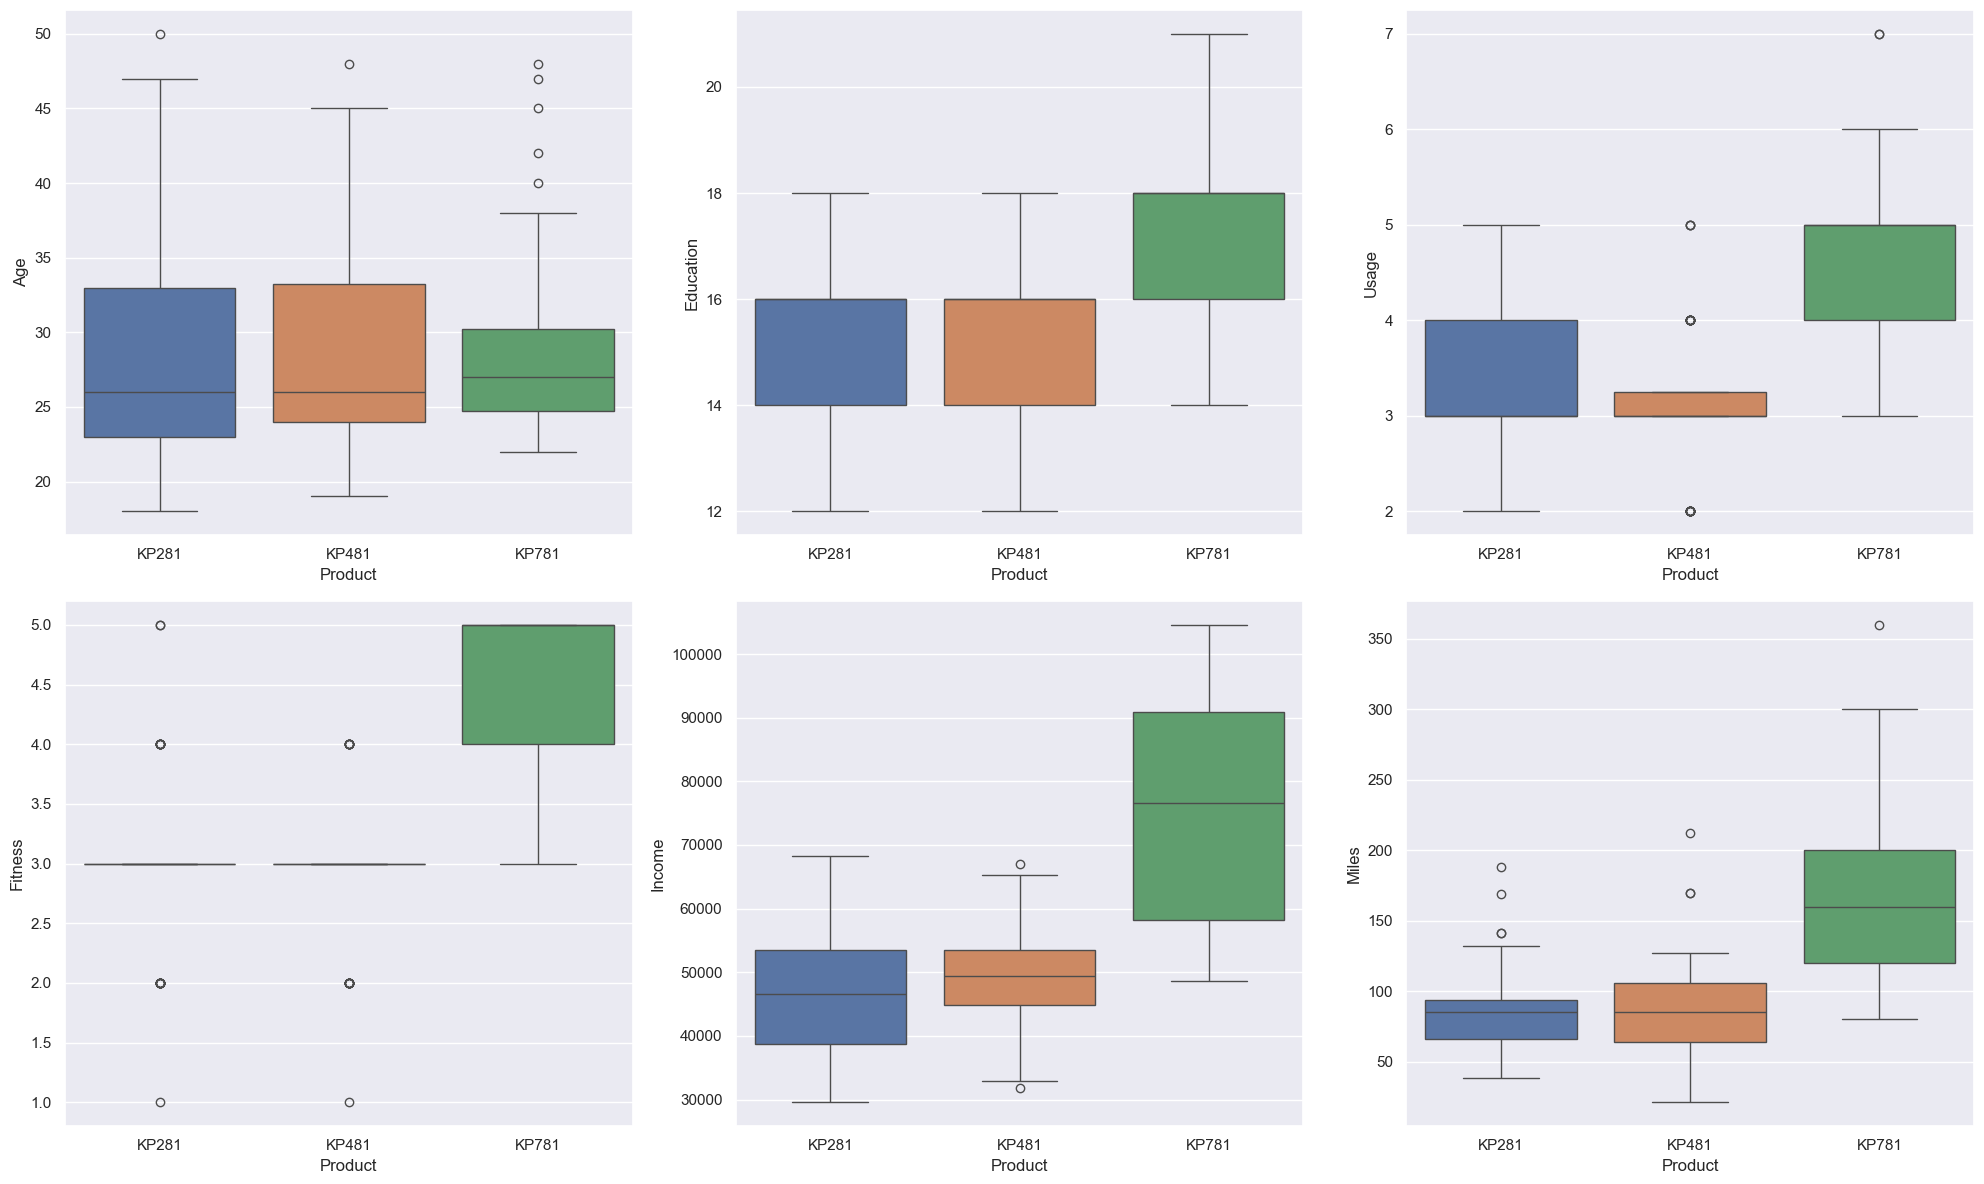

In [24]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

sns.boxplot(data=aerofit_df, x='Product', y='Age', hue='Product', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x='Product', y='Education', hue='Product', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x='Product', y='Usage', hue='Product', ax=axis[0,2])
sns.boxplot(data=aerofit_df, x='Product', y='Fitness', hue='Product', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x='Product', y='Income', hue='Product', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x='Product', y='Miles', hue='Product', ax=axis[1,2])

plt.tight_layout()
plt.show()

## Observation 
- Product vs Age : 
Customers purchasing products KP281 & KP481 are having the same Age median value.
Customers whose age lies between 25-30, are more likely to buy the KP781 product
- Product vs Education : 
Customers whose Education is >=16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
- Product vs Usage : 
Customers who are planning to use the treadmill more than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchase KP281 or KP481.
- Product vs Fitness : 
The more fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.
- Product vs Income : 
The higher the Income of the customer (Income >= 60000), the higher the chances of the customer purchasing the KP781 product.
- Product vs Miles : 
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.


In [25]:
bins_age = [14,20,30,40,60]
labels_age = ['Teens','20s','30s', 'Above 40s']

aerofit_df['LifeStage'] = pd.cut(aerofit_df["Age"], bins_age, labels=labels_age)
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price,LifeStage
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0,Teens
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0,Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0,Teens
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0,Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0,Teens
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500.0,30s
176,KP781,42,Male,18,Single,5,4,89641,200,2500.0,Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,2500.0,Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500.0,Above 40s


In [26]:
bins_income = [29000,35000,60000,85000,105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']

aerofit_df['IncomeCategory'] = pd.cut(aerofit_df["Income"], bins_income, labels=labels_income)
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price,LifeStage,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0,Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0,Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0,Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0,Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0,Teens,Lower-middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500.0,30s,Upper-Middle Income
176,KP781,42,Male,18,Single,5,4,89641,200,2500.0,Above 40s,High Income
177,KP781,45,Male,16,Single,5,5,90886,160,2500.0,Above 40s,High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500.0,Above 40s,High Income


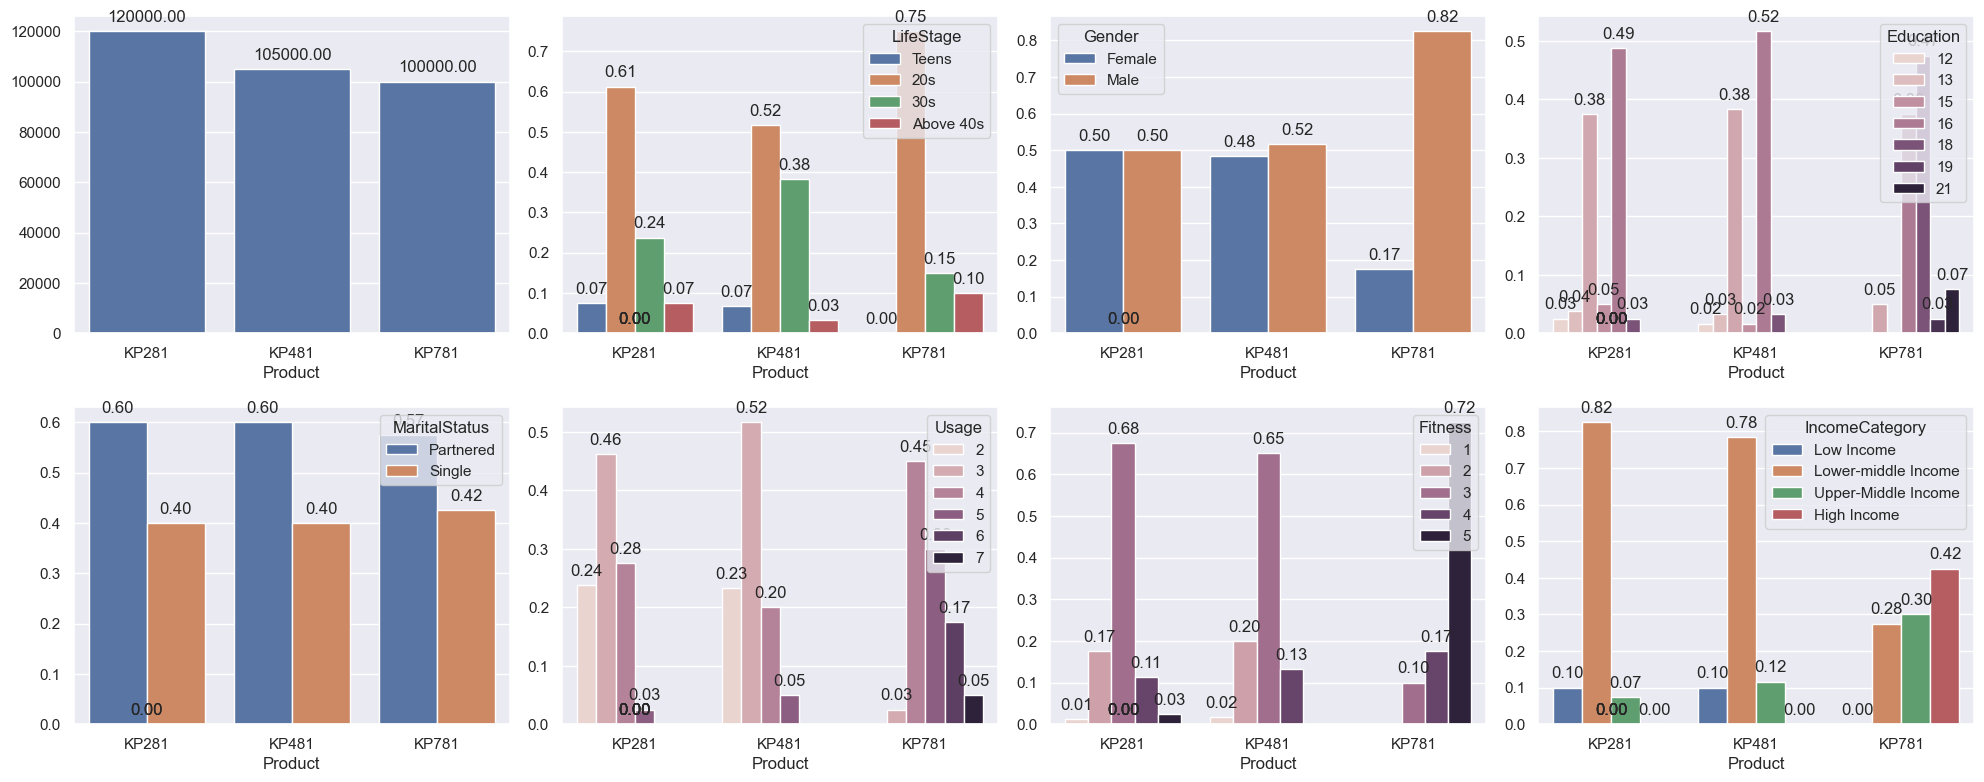

In [27]:
product_revenue = aerofit_df.groupby('Product')['Price'].sum().reset_index(name='Revenue')
product_age = aerofit_df.groupby('Product')['LifeStage'].value_counts(normalize=True).reset_index(name='Count')
product_gender = aerofit_df.groupby('Product')['Gender'].value_counts(normalize=True).reset_index(name='Count')
product_education = aerofit_df.groupby('Product')['Education'].value_counts(normalize=True).reset_index(name='Count')

product_marital = aerofit_df.groupby('Product')['MaritalStatus'].value_counts(normalize=True).reset_index(name='Count')
product_usage = aerofit_df.groupby('Product')['Usage'].value_counts(normalize=True).reset_index(name='Count')
product_fitness = aerofit_df.groupby('Product')['Fitness'].value_counts(normalize=True).reset_index(name='Count')
product_income = aerofit_df.groupby('Product')['IncomeCategory'].value_counts(normalize=True).reset_index(name='Count')

fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

sns.barplot(data=product_revenue, x="Product", y='Revenue', ax=axis[0,0])
sns.barplot(data=product_age, x="Product", y='Count', hue = 'LifeStage',ax=axis[0,1])
sns.barplot(data=product_gender, x="Product", y='Count', hue='Gender', ax=axis[0,2])
sns.barplot(data=product_education, x="Product", y='Count', hue='Education', ax=axis[0,3])

sns.barplot(data=product_marital, x="Product", y='Count', hue='MaritalStatus', ax=axis[1,0])
sns.barplot(data=product_usage, x="Product", y='Count', hue='Usage', ax=axis[1,1])
sns.barplot(data=product_fitness, x="Product", y='Count', hue='Fitness', ax=axis[1,2])
sns.barplot(data=product_income, x="Product", y='Count', hue='IncomeCategory', ax=axis[1,3])

for ax in axis.flat:
    ax.set_ylabel('')

# Add data labels
for ax in axis.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
plt.tight_layout()
plt.show()

## Observation 
### KP281: 
- The model has generated the highest revenue, with customers in their 20s showing a preference for it. It is equally popular among males and females. Customers who have completed 14 or 16 years of education and are in a relationship tend to favor this model. They typically use it 3-4 times a week, have a fitness level of 3 out of 5, and earn between $35,000 - $60,000.

### KP481:
- The model has generated the 2nd highest revenue, the consumer insights are identical to KP281. The only difference is that they typically use it 2-3 times a week.

### KP781: 
- The model has generated the 3rd highest revenue. It is majorly popular among males. Customers who have completed 16 or 18 years of education and are in a relationship tend to favor this model. They typically use it 4-5 times a week, have a fitness level of 5 out of 5, and earn > $60,000.

# Multivariate Analysis 

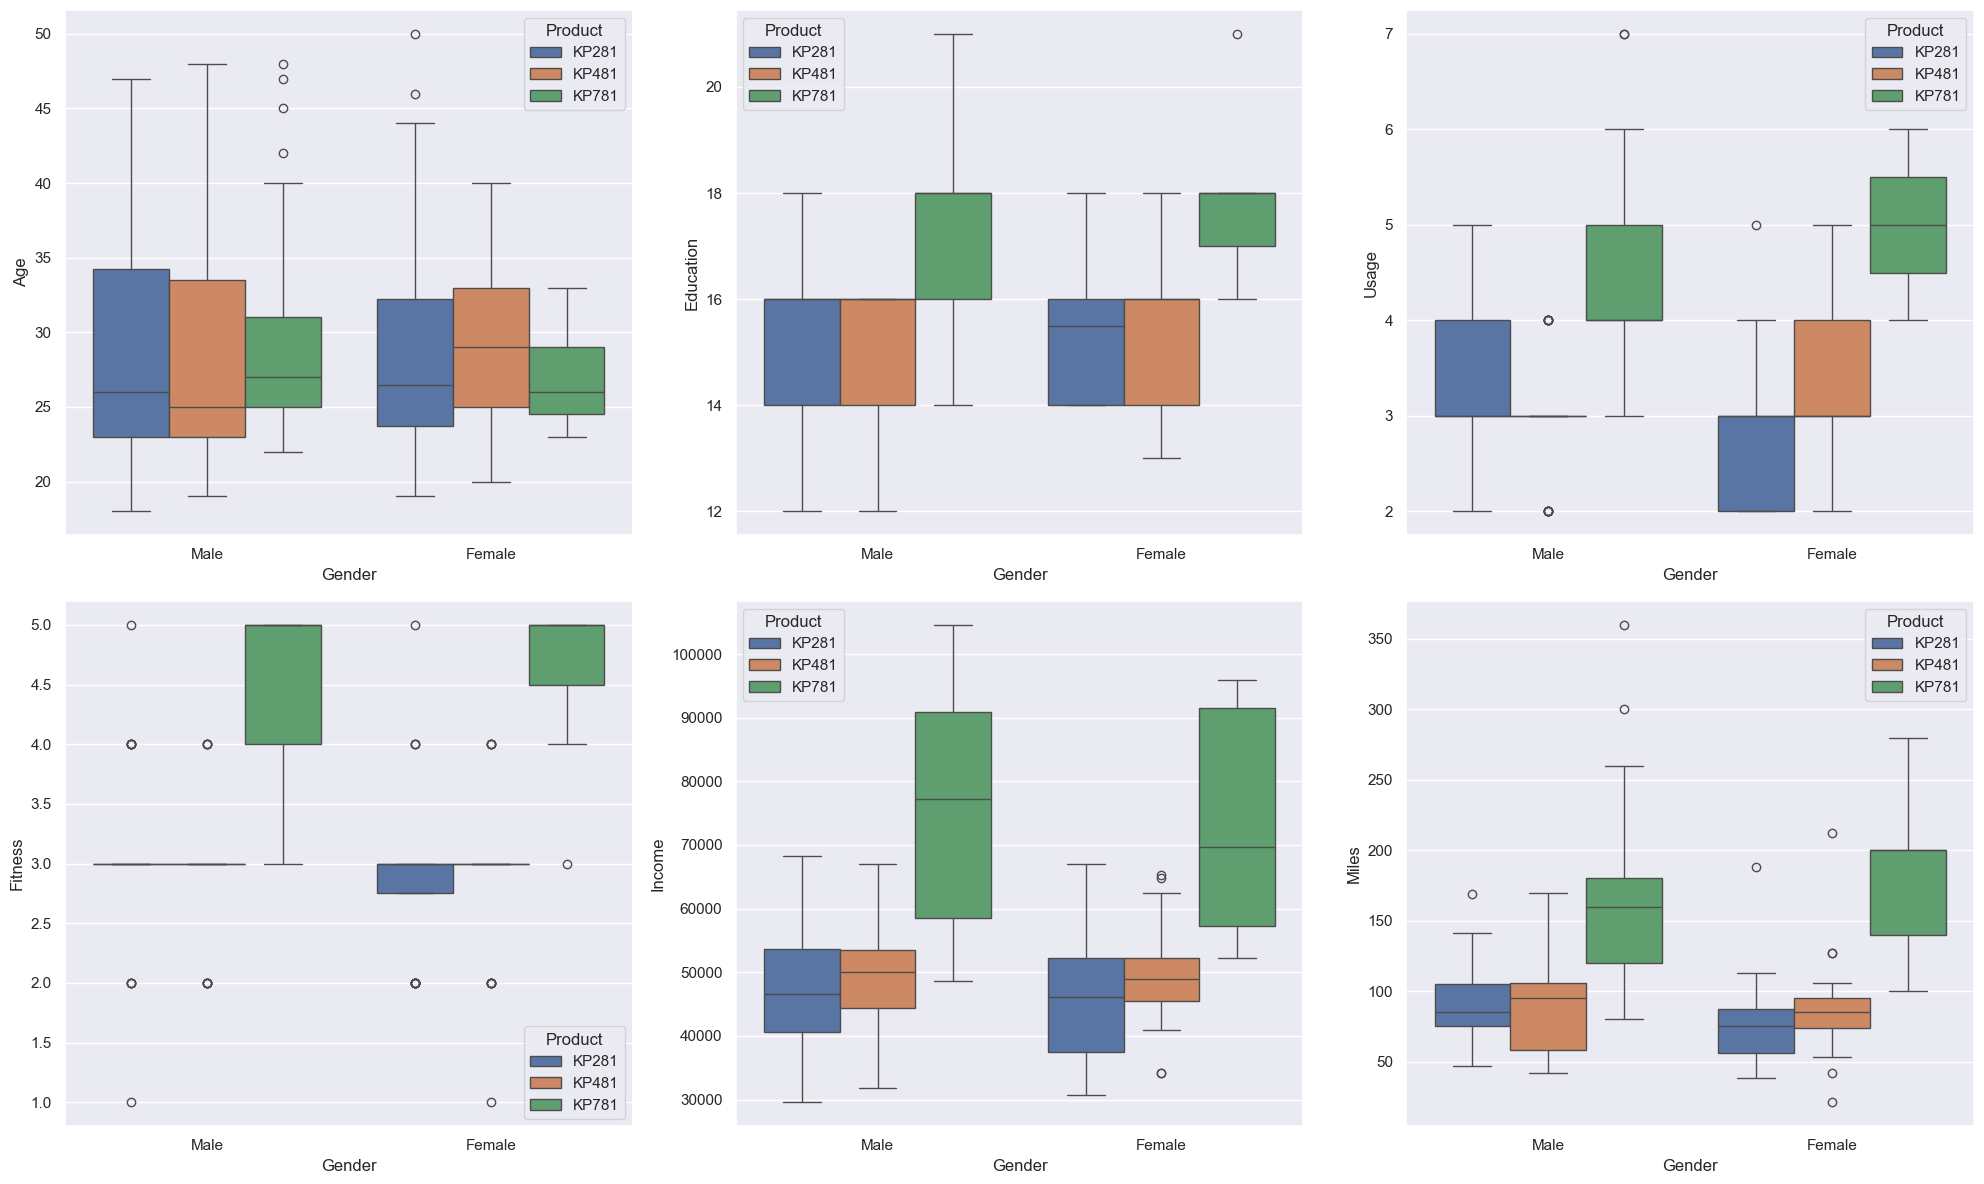

In [28]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

sns.boxplot(data=aerofit_df, x='Gender', y='Age', hue='Product', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x='Gender', y='Education', hue='Product', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x='Gender', y='Usage', hue='Product', ax=axis[0,2])
sns.boxplot(data=aerofit_df, x='Gender', y='Fitness', hue='Product', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x='Gender', y='Income', hue='Product', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x='Gender', y='Miles', hue='Product', ax=axis[1,2])

plt.tight_layout()
plt.show()

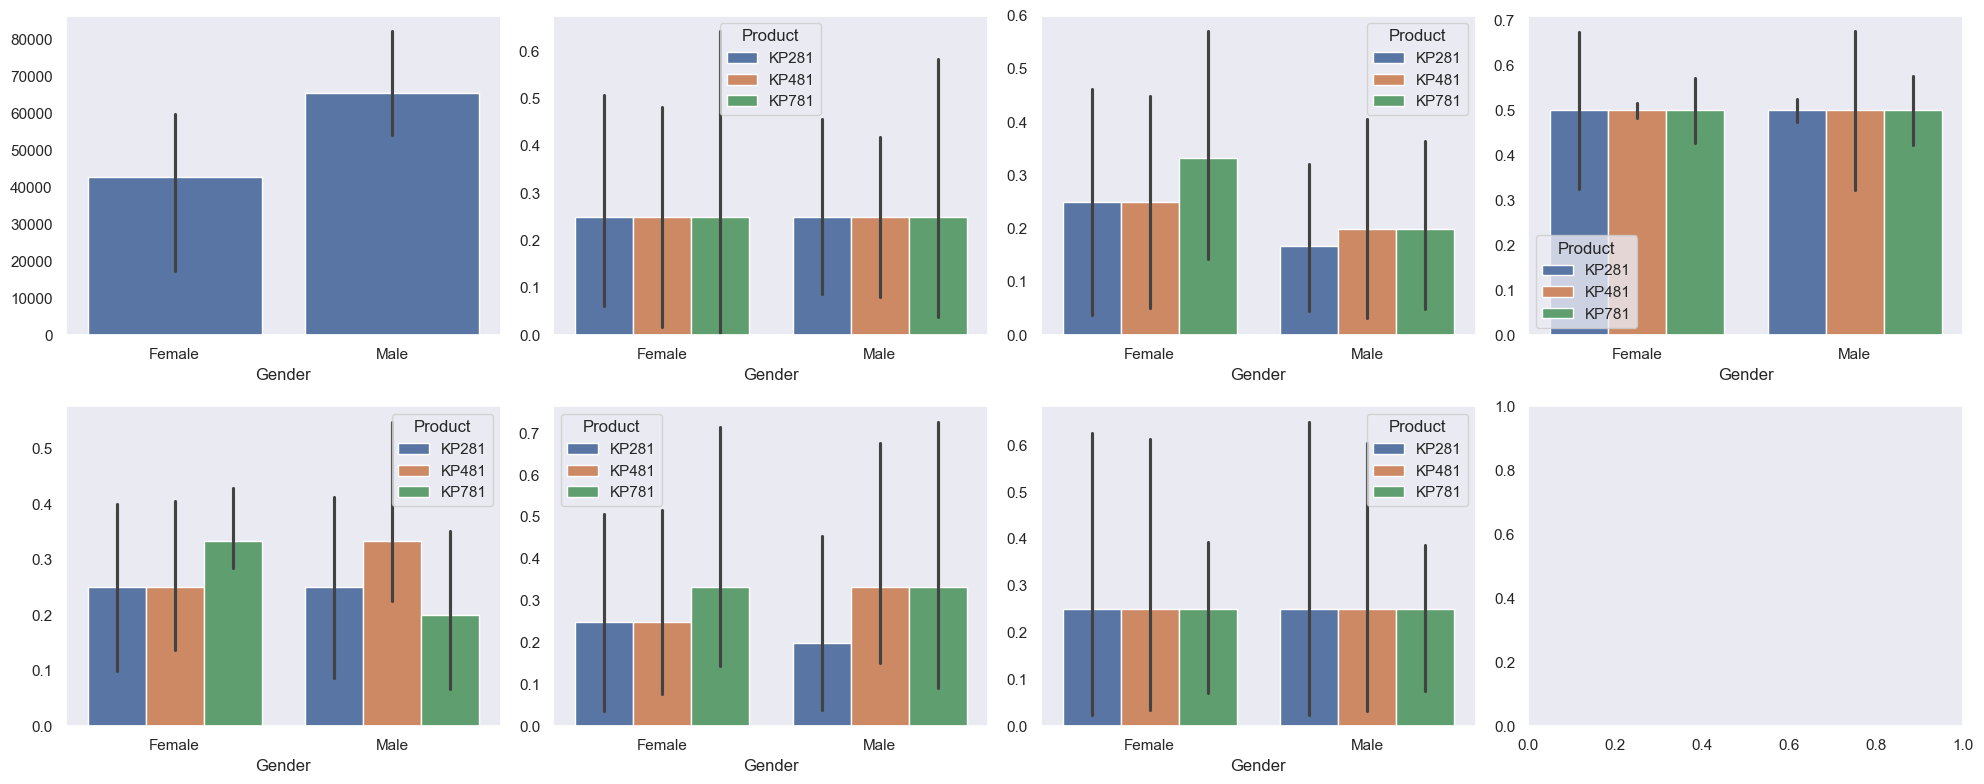

In [29]:
gender_revenue = aerofit_df.groupby(['Gender', 'Product'])['Price'].sum().reset_index(name='Revenue')
gender_age = aerofit_df.groupby(['Gender', 'Product'])['LifeStage'].value_counts(normalize=True).reset_index(name='Count')
gender_education = aerofit_df.groupby(['Gender', 'Product'])['Education'].value_counts(normalize=True).reset_index(name='Count')
gender_marital = aerofit_df.groupby(['Gender', 'Product'])['MaritalStatus'].value_counts(normalize=True).reset_index(name='Count')
gender_usage = aerofit_df.groupby(['Gender', 'Product'])['Usage'].value_counts(normalize=True).reset_index(name='Count')
gender_fitness = aerofit_df.groupby(['Gender', 'Product'])['Fitness'].value_counts(normalize=True).reset_index(name='Count')
gender_income = aerofit_df.groupby(['Gender', 'Product'])['IncomeCategory'].value_counts(normalize=True).reset_index(name='Count')


fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

sns.barplot(data=gender_revenue, x="Gender", y='Revenue', ax=axis[0,0])
sns.barplot(data=gender_age, x="Gender", y='Count', hue = 'Product',ax=axis[0,1])
sns.barplot(data=gender_education, x="Gender", y='Count', hue='Product', ax=axis[0,2])
sns.barplot(data=gender_marital, x="Gender", y='Count', hue='Product', ax=axis[0,3])

sns.barplot(data=gender_usage, x="Gender", y='Count', hue='Product', ax=axis[1,0])
sns.barplot(data=gender_fitness, x="Gender", y='Count', hue='Product', ax=axis[1,1])
sns.barplot(data=gender_income, x="Gender", y='Count', hue='Product', ax=axis[1,2])


for ax in axis.flat:
    ax.set_ylabel('')

for ax in axis.flat:
    ax.grid(False)
    
plt.tight_layout()
plt.show()

# Correlation Analysis

<Axes: >

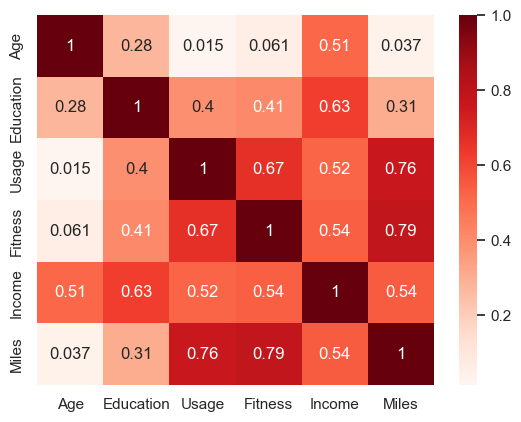

In [30]:
int64_df = aerofit_df.select_dtypes(include=['int64'])
sns.heatmap(int64_df.corr(), annot=True, cmap="Reds")

## Observation

- (Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

- Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.

- There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills.

# CONCULUSION 
## Target Market:
- The majority of treadmill customers, who are typically aged between 20-30 and have 14-16 years of education, expect to use the treadmills 3-4 times a week, with a fitness level of 3, and fall within the income range of $35,000 - $60,000; they are more likely to be male and partnered.

## KP281 Customer Profile:
- Age: Primarily in their 20s.
- Gender: Equally popular among males and females.
- Education: Typically completed 14 or 16 years of education.
- Relationship Status: Usually in a relationship.
- Usage: Prefer to use it 3-4 times a week.
- Fitness Level: Have a fitness level of 3 out of 5.
- Income: Earn between $35,000-$60,000.
  
## KP481 Customer Profile:
- Age: Typically in their 20s.
- Gender: Equally popular among males and females.
- Education: Typically completed 14 or 16 years of education.
- Relationship Status: Usually in a relationship.
- Usage: Prefer to use it 2-3 times a week.
- Fitness Level: Have a fitness level of 3 out of 5.
- Income: Earn between $35,000-$60,000.

## KP781 Customer Profile:
- Age: More likely to be in the age range of 25-30.
- Gender: More popular among males.
- Education: Typically completed 16 or 18 years of education.
- Relationship Status: Usually in a relationship.
- Usage: Prefer to use it 4-5 times a week.
- Fitness Level: Have a fitness level of 5 out of 5.
- Income: Earn more than $60,000.